DSSP
Windows:
conda install -c speleo3 dssp
Other:
conda install -c salilab dssp

In [2]:
!conda activate struct_bioinf
# !conda install matplotlib

import pypdb
import nglview as nv
import MDAnalysis as mda
import Bio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## PYPDB examples - python api for RCSB

### Search

In [3]:
found_pdbs = pypdb.Query("ribosome").search()
found_pdbs[:10]

['1JGQ',
 '1JGP',
 '1JGO',
 '1IBM',
 '1IBL',
 '1IBK',
 '1ML5',
 '1SM1',
 '1NWY',
 '1NWX']

In [4]:
found_pdbs = pypdb.Query(27499440, "PubmedIdQuery").search()
print(found_pdbs[:10])

['5IMT', '5IMW', '5IMY']


In [5]:
found_pdbs = pypdb.Query('SOLID-STATE NMR', query_type='ExpTypeQuery').search()
print(found_pdbs[:10])

['2RLZ', '3ZPK', '2W0N', '3J07', '2XKM', '5UK6', '5V7Z', '5UGK', '5W3N', '5JXV']


In [6]:
found_pdbs = pypdb.Query('2E8D', query_type="structure").search()
print(found_pdbs[:10])

['2E8D', '4OBA', '4OGV', '4JVR', '3LBL', '4QO4', '4JWR', '2WS4', '4ERE', '2CEU']


In [7]:
q = pypdb.Query("Dictyostelium", query_type="OrganismQuery")
print(q.search()[:10])

['4AE3', '3MNQ', '2H84', '6QKL', '5AN9', '4AKR', '2WN2', '2WN3', '2VMC', '2VMD']


### Advanced search using json api

![image.png](attachment:image.png)

In [8]:
import json
from urllib.parse import quote
import urllib

In [9]:
querry={
  "query": {
    "type": "group",
    "logical_operator": "and",
    "nodes": [
      {
        "type": "terminal",
        "service": "text",
        "parameters": {
          "value": "myoglobin"
        }
      },
      {
        "type": "terminal",
        "service": "text",
        "parameters": {
          "operator": "exact_match",
          "value": "Protein (only)",
          "attribute": "rcsb_entry_info.selected_polymer_entity_types"
        }
      },
      {
        "type": "terminal",
        "service": "text",
        "parameters": {
          "operator": "less_or_equal",
          "value": 1.7,
          "attribute": "rcsb_entry_info.resolution_combined"
        }
      },
      {
        "type": "terminal",
        "service": "text",
        "parameters": {
          "operator": "equals",
          "value": 1, #smaller
          "attribute": "rcsb_entry_info.polymer_entity_count_protein"
        }
      },
      {
        "type": "terminal",
        "service": "text",
        "parameters": {
          "operator": "exact_match",
          "value": "Homo sapiens",
          "attribute": "rcsb_entity_source_organism.taxonomy_lineage.name"
        }
      }
    ]
  },
  "return_type": "entry",
  "request_options": {
    "pager": {
      "start": 0,
      "rows": 100
    },
    "scoring_strategy": "combined",
    "sort": [
      {
        "sort_by": "score",
        "direction": "desc"
      }
    ]
  }
}
url_root = 'https://search.rcsb.org/rcsbsearch/v1/query?json='

response=urllib.request.urlopen(url_root+quote(json.dumps(querry)))
results=json.load(response)

results['result_set']

[{'identifier': '3RGK',
  'score': 1.0,
  'services': [{'service_type': 'text',
    'nodes': [{'node_id': 21509,
      'original_score': 13.743382453918457,
      'norm_score': 1.0}]}]},
 {'identifier': '6G4L',
  'score': 0.33855571821494607,
  'services': [{'service_type': 'text',
    'nodes': [{'node_id': 21509,
      'original_score': 9.903244018554688,
      'norm_score': 0.33855571821494607}]}]},
 {'identifier': '1I3D',
  'score': 0.33855571821494607,
  'services': [{'service_type': 'text',
    'nodes': [{'node_id': 21509,
      'original_score': 9.903244018554688,
      'norm_score': 0.33855571821494607}]}]},
 {'identifier': '6TX5',
  'score': 0.33855571821494607,
  'services': [{'service_type': 'text',
    'nodes': [{'node_id': 21509,
      'original_score': 9.903244018554688,
      'norm_score': 0.33855571821494607}]}]},
 {'identifier': '6TX8',
  'score': 0.33855571821494607,
  'services': [{'service_type': 'text',
    'nodes': [{'node_id': 21509,
      'original_score': 9.9032

In [10]:
description=pypdb.describe_pdb('6SBH')

In [11]:
description['pdbx_vrpt_summary']

{'babinet_b': 10.0,
 'babinet_k': 0.197,
 'fo_fc_correlation': 0.982,
 'wilson_baniso': '[8.626,8.695,7.299,0.000,-0.494,0.000]',
 'wilson_bestimate': 8.127,
 'absolute_percentile_dccrfree': 99.7,
 'absolute_percentile_clashscore': 91.5,
 'absolute_percentile_percent_rsrzoutliers': 100.0,
 'absolute_percentile_percent_ramachandran_outliers': 100.0,
 'absolute_percentile_percent_rotamer_outliers': 100.0,
 'acentric_outliers': 0,
 'angles_rmsz': 0.68,
 'attempted_validation_steps': 'molprobity,validation-pack,xtriage,eds,mogul,buster-report,percentiles,writexml',
 'bonds_rmsz': 0.41,
 'bulk_solvent_b': 46.054,
 'bulk_solvent_k': 0.46,
 'ccp4version': '7.0.044 (Gargrove)',
 'centric_outliers': 0.0,
 'clashscore': 1.62,
 'data_anisotropy': 0.17,
 'data_completeness': 93.26,
 'high_resol_relative_percentile_dccrfree': 0.86,
 'high_resol_relative_percentile_clashscore': 0.86,
 'high_resol_relative_percentile_percent_rsrzoutliers': 0.86,
 'high_resol_relative_percentile_percent_ramachandran_o

In [12]:
entity=pypdb.describe_pdb('6SBH/1',url_root='https://data.rcsb.org/rest/v1/core/polymer_entity/')
entity

[{'id': 'GO:0001894', 'name': 'tissue homeostasis'},
    {'id': 'GO:0008150', 'name': 'biological_process'},
    {'id': 'GO:0032501', 'name': 'multicellular organismal process'},
    {'id': 'GO:0034103', 'name': 'regulation of tissue remodeling'},
    {'id': 'GO:0042592', 'name': 'homeostatic process'},
    {'id': 'GO:0045124', 'name': 'regulation of bone resorption'},
    {'id': 'GO:0045453', 'name': 'bone resorption'},
    {'id': 'GO:0045780', 'name': 'positive regulation of bone resorption'},
    {'id': 'GO:0046849', 'name': 'bone remodeling'},
    {'id': 'GO:0046850', 'name': 'regulation of bone remodeling'},
    {'id': 'GO:0048518', 'name': 'positive regulation of biological process'},
    {'id': 'GO:0048771', 'name': 'tissue remodeling'},
    {'id': 'GO:0048871', 'name': 'multicellular organismal homeostasis'},
    {'id': 'GO:0050789', 'name': 'regulation of biological process'},
    {'id': 'GO:0051239',
     'name': 'regulation of multicellular organismal process'},
    {'id': '

In [13]:
entity['rcsb_polymer_entity_container_identifiers']

{'asym_ids': ['A'],
 'auth_asym_ids': ['A'],
 'chem_comp_monomers': ['ALA',
  'ARG',
  'ASN',
  'ASP',
  'CYS',
  'GLN',
  'GLU',
  'GLY',
  'HIS',
  'ILE',
  'LEU',
  'LYS',
  'MET',
  'PHE',
  'PRO',
  'SER',
  'THR',
  'TRP',
  'TYR',
  'VAL'],
 'entity_id': '1',
 'entry_id': '6SBH',
 'rcsb_id': '6SBH_1',
 'reference_sequence_identifiers': [{'database_accession': 'P00918',
   'database_name': 'UniProt',
   'provenance_source': 'SIFTS'}],
 'uniprot_ids': ['P00918']}

In [14]:
view=nv.show_text(pypdb.get_pdb_file('6SBH'))
view

NGLWidget()

In [15]:
view.update_cartoon(colorScheme='bFactor')

In [16]:
view.add_contact('protein or L4K')

In [17]:
view.add_surface('protein',colorScheme='hydrophobicity',opacity=0.5) # electrostatic

In [18]:
view.download_image(factor=4,transparent=True)

## Mdanalysis examples

In [19]:
with open('6SBH.pdb','w') as f:
    f.write(pypdb.get_pdb_file('6SBH'))

In [20]:
molecule=mda.Universe('6SBH.pdb')

C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\MDAnalysis\topology\guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: HG
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\MDAnalysis\topology\base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\MDAnalysis\topology\PDBParser.py:426: 

In [21]:
# loading may not be needed
import io
mol=mda.Universe(io.StringIO(pypdb.get_pdb_file('6SBH')),format='pdb')

In [22]:
molecule

<Universe with 5107 atoms>

In [23]:
molecule.segments

<SegmentGroup with 1 segment>

In [24]:
molecule.segments
#segids

<SegmentGroup with 1 segment>

In [25]:
molecule.segments.residues.resnames
#resids, resnums, resnames

array(['HIS', 'TRP', 'GLY', 'TYR', 'GLY', 'LYS', 'HIS', 'ASN', 'GLY',
       'PRO', 'GLU', 'HIS', 'TRP', 'HIS', 'LYS', 'ASP', 'PHE', 'PRO',
       'ILE', 'ALA', 'LYS', 'GLY', 'GLU', 'ARG', 'GLN', 'SER', 'PRO',
       'VAL', 'ASP', 'ILE', 'ASP', 'THR', 'HIS', 'THR', 'ALA', 'LYS',
       'TYR', 'ASP', 'PRO', 'SER', 'LEU', 'LYS', 'PRO', 'LEU', 'SER',
       'VAL', 'SER', 'TYR', 'ASP', 'GLN', 'ALA', 'THR', 'SER', 'LEU',
       'ARG', 'ILE', 'LEU', 'ASN', 'ASN', 'GLY', 'HIS', 'ALA', 'PHE',
       'ASN', 'VAL', 'GLU', 'PHE', 'ASP', 'ASP', 'SER', 'GLN', 'ASP',
       'LYS', 'ALA', 'VAL', 'LEU', 'LYS', 'GLY', 'GLY', 'PRO', 'LEU',
       'ASP', 'GLY', 'THR', 'TYR', 'ARG', 'LEU', 'ILE', 'GLN', 'PHE',
       'HIS', 'PHE', 'HIS', 'TRP', 'GLY', 'SER', 'LEU', 'ASP', 'GLY',
       'GLN', 'GLY', 'SER', 'GLU', 'HIS', 'THR', 'VAL', 'ASP', 'LYS',
       'LYS', 'LYS', 'TYR', 'ALA', 'ALA', 'GLU', 'LEU', 'HIS', 'LEU',
       'VAL', 'HIS', 'TRP', 'ASN', 'THR', 'LYS', 'TYR', 'GLY', 'ASP',
       'PHE', 'GLY',

In [26]:
molecule.segments.residues.resnums

array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

In [27]:
molecule.segments.residues.atoms.positions
#...

array([[-10.604,  -0.136,   7.669],
       [-11.519,   0.446,   8.637],
       [-12.183,  -0.655,   9.459],
       ...,
       [-17.242,   9.962,  23.4  ],
       [-24.049,  10.297,  11.148],
       [-22.743,   7.988,   9.732]], dtype=float32)

In [28]:
molecule.segments.residues.atoms.center_of_geometry()

array([-30.98322146,  -1.46615645,  17.37592344])

In [29]:
selection = molecule.select_atoms('(resname L4K) or (around 10 resname L4K)')

C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\MDAnalysis\core\selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\MDAnalysis\lib\distances.py:715: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; f

In [30]:
selection

<AtomGroup with 834 atoms>

In [31]:
selection.center_of_geometry(), selection.radius_of_gyration()

(array([-26.52558037,   3.44483331,  17.07547481]), 9.814546495298934)

In [32]:
selection.masses.sum()

6577.071999999999

In [33]:
molecule.select_atoms('protein').masses.sum()

34666.909

In [34]:
molecule.select_atoms('protein').radius_of_gyration()

17.57482198083978

In [35]:
nv.show_mdanalysis(selection)

NGLWidget()

In [36]:
# extracting real sequence and resids
from Bio.PDB.Polypeptide import three_to_one, one_to_three
seq_3_base=molecule.select_atoms('protein').residues

#конвертация в однобукв названия
sequence=''.join([three_to_one(aa.resname) for aa in seq_3_base])
resids=[aa.resnum for aa in seq_3_base]

In [37]:
sequence

'HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK'

## Protein parameters by sequence

In [38]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis,ProtParamData
#оценка свойств белка
pa=ProteinAnalysis(sequence)

In [39]:
#процент ароматических кислот
print(pa.aromaticity())
#заряд при заданном pH
print(pa.charge_at_pH(7.0))
#изолектрическая точка - тот pH при котором заряд 0
print(pa.isoelectric_point())
#индекс нестабильности белка
print(pa.instability_index()) # should be < 40
#кофф мол экстинция по числу аром кислот, поглощающих ультрафиолет
print(pa.molar_extinction_coefficient()) 
#процент содержания различных 2 стр
print(pa.secondary_structure_fraction()) # helix, turn, sheet
#скор гидрофобности белка (+ - фобный, - фильный)
print(pa.gravy()) 

0.10505836575875487
-0.2650908728685053
6.906471824645997
20.11128404669259
(50420, 50420)
(0.30739299610894943, 0.25680933852140075, 0.20622568093385213)
-0.5774319066147867


In [40]:
pa.get_amino_acids_percent()

{'A': 0.05058365758754864,
 'C': 0.0038910505836575876,
 'D': 0.07392996108949416,
 'E': 0.05058365758754864,
 'F': 0.04669260700389105,
 'G': 0.08560311284046693,
 'H': 0.042801556420233464,
 'I': 0.03501945525291829,
 'K': 0.0933852140077821,
 'L': 0.10116731517509728,
 'M': 0.0038910505836575876,
 'N': 0.038910505836575876,
 'P': 0.06614785992217899,
 'Q': 0.042801556420233464,
 'R': 0.027237354085603113,
 'S': 0.06614785992217899,
 'T': 0.04669260700389105,
 'V': 0.06614785992217899,
 'W': 0.027237354085603113,
 'Y': 0.0311284046692607}

# DSSP examples

In [41]:
with open('6SBH.pdb','w') as f:
    f.write(pypdb.get_pdb_file('6SBH'))

In [42]:
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
p = PDBParser()
structure = p.get_structure("6SBH", "6SBH.pdb")
model = structure[0]
dssp = DSSP(model, "6SBH.pdb")

In [43]:
#индекс цепи + номер остатка
dssp.keys()

[('A', (' ', 4, ' ')),
 ('A', (' ', 5, ' ')),
 ('A', (' ', 6, ' ')),
 ('A', (' ', 7, ' ')),
 ('A', (' ', 8, ' ')),
 ('A', (' ', 9, ' ')),
 ('A', (' ', 10, ' ')),
 ('A', (' ', 11, ' ')),
 ('A', (' ', 12, ' ')),
 ('A', (' ', 13, ' ')),
 ('A', (' ', 14, ' ')),
 ('A', (' ', 15, ' ')),
 ('A', (' ', 16, ' ')),
 ('A', (' ', 17, ' ')),
 ('A', (' ', 18, ' ')),
 ('A', (' ', 19, ' ')),
 ('A', (' ', 20, ' ')),
 ('A', (' ', 21, ' ')),
 ('A', (' ', 22, ' ')),
 ('A', (' ', 23, ' ')),
 ('A', (' ', 24, ' ')),
 ('A', (' ', 25, ' ')),
 ('A', (' ', 26, ' ')),
 ('A', (' ', 27, ' ')),
 ('A', (' ', 28, ' ')),
 ('A', (' ', 29, ' ')),
 ('A', (' ', 30, ' ')),
 ('A', (' ', 31, ' ')),
 ('A', (' ', 32, ' ')),
 ('A', (' ', 33, ' ')),
 ('A', (' ', 34, ' ')),
 ('A', (' ', 35, ' ')),
 ('A', (' ', 36, ' ')),
 ('A', (' ', 37, ' ')),
 ('A', (' ', 38, ' ')),
 ('A', (' ', 39, ' ')),
 ('A', (' ', 40, ' ')),
 ('A', (' ', 41, ' ')),
 ('A', (' ', 42, ' ')),
 ('A', (' ', 43, ' ')),
 ('A', (' ', 44, ' ')),
 ('A', (' ', 45, ' '))

In [44]:
# (dssp index, amino acid, secondary structure, relative ASA, phi, psi,
# NH_O_1_relidx, NH_O_1_energy, O_NH_1_relidx, O_NH_1_energy,
# NH_O_2_relidx, NH_O_2_energy, O_NH_2_relidx, O_NH_2_energy)
dssp[dssp.keys()[5]]

(6,
 'K',
 'T',
 0.4097560975609756,
 -59.0,
 -38.4,
 1,
 -0.2,
 -1,
 -0.1,
 2,
 -0.2,
 5,
 -0.1)

In [45]:
columns='dssp index,amino acid,secondary structure,relative ASA,phi,psi,NH_O_1_relidx,NH_O_1_energy,O_NH_1_relidx,O_NH_1_energy,NH_O_2_relidx,NH_O_2_energy,O_NH_2_relidx,O_NH_2_energy'.split(',')
df=pd.DataFrame(dssp.property_list,columns=columns)
df

,dssp index,amino acid,secondary structure,relative ASA,phi,psi,NH_O_1_relidx,NH_O_1_energy,O_NH_1_relidx,O_NH_1_energy,NH_O_2_relidx,NH_O_2_energy,O_NH_2_relidx,O_NH_2_energy
0,1,H,-,0.695652,360.0,177.7,0,0.0,0,0.0,0,0.0,0,0.0
1,2,W,-,0.242291,-68.1,153.1,1,-0.1,2,-0.2,11,-0.1,7,-0.2
2,3,G,-,0.083333,-161.8,-144.6,5,-2.6,10,-0.1,2,-0.2,-1,-0.1
3,4,Y,S,0.148649,-122.3,-0.5,-2,-0.2,5,-0.2,5,-0.2,237,-0.1
4,5,G,S,0.488095,-74.0,178.4,4,-0.1,4,-1.8,1,-0.1,3,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,253,K,E,0.219512,-106.0,146.3,-64,-2.5,-64,-2.5,-2,-0.5,2,-0.4
253,254,A,E,0.056604,-109.1,144.9,-218,-2.5,-216,-2.1,-2,-0.3,-66,-0.2
254,255,S,S,0.238462,-84.5,-7.9,-68,-2.7,2,-0.3,-2,-0.4,-67,-0.1
255,256,F,-,0.248731,-129.0,142.6,-69,-0.3,-2,-0.1,1,-0.0,-219,-0.0


H = α-helix.
B = residue in isolated β-bridge.
E = extended strand, participates in β ladder.
G = 3-helix (310 helix)
I = 5 helix (π-helix)
T = hydrogen bonded turn.
S = bend.

In [46]:
print(pa.secondary_structure_fraction())

(0.30739299610894943, 0.25680933852140075, 0.20622568093385213)


In [47]:
#E - бетта, S - изгибы, T - повороты, H - спираль

df['secondary structure'].value_counts()/len(df)

E    0.299611
-    0.260700
S    0.151751
T    0.128405
G    0.081712
H    0.066148
B    0.011673
Name: secondary structure, dtype: float64

## Ramachandran

C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


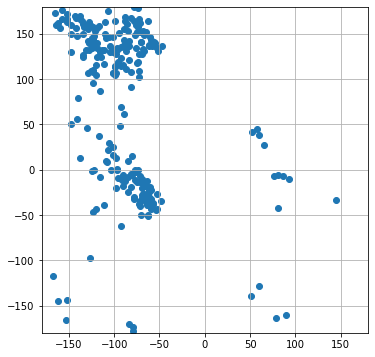

In [48]:
plt.figure(figsize=(6,6))
plt.scatter(df.phi,df.psi)
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.grid(True)
plt.axes().set_aspect('equal')

#карта рамочандрана

![image.png](attachment:image.png)

## Hydrophobicity

![image.png](attachment:image.png)

In [49]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis,ProtParamData

In [50]:
#шкала кальда дулета 
ProtParamData.kd

{'A': 1.8,
 'R': -4.5,
 'N': -3.5,
 'D': -3.5,
 'C': 2.5,
 'Q': -3.5,
 'E': -3.5,
 'G': -0.4,
 'H': -3.2,
 'I': 4.5,
 'L': 3.8,
 'K': -3.9,
 'M': 1.9,
 'F': 2.8,
 'P': -1.6,
 'S': -0.8,
 'T': -0.7,
 'W': -0.9,
 'Y': -1.3,
 'V': 4.2}

In [51]:
pa=ProteinAnalysis(sequence)
pa.gravy() # sequence derived

-0.5774319066147867

In [52]:
df['Kyte-Doolitle']=df['amino acid'].map(ProtParamData.kd)
df

,dssp index,amino acid,secondary structure,relative ASA,phi,psi,NH_O_1_relidx,NH_O_1_energy,O_NH_1_relidx,O_NH_1_energy,NH_O_2_relidx,NH_O_2_energy,O_NH_2_relidx,O_NH_2_energy,Kyte-Doolitle
0,1,H,-,0.695652,360.0,177.7,0,0.0,0,0.0,0,0.0,0,0.0,-3.2
1,2,W,-,0.242291,-68.1,153.1,1,-0.1,2,-0.2,11,-0.1,7,-0.2,-0.9
2,3,G,-,0.083333,-161.8,-144.6,5,-2.6,10,-0.1,2,-0.2,-1,-0.1,-0.4
3,4,Y,S,0.148649,-122.3,-0.5,-2,-0.2,5,-0.2,5,-0.2,237,-0.1,-1.3
4,5,G,S,0.488095,-74.0,178.4,4,-0.1,4,-1.8,1,-0.1,3,-0.4,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,253,K,E,0.219512,-106.0,146.3,-64,-2.5,-64,-2.5,-2,-0.5,2,-0.4,-3.9
253,254,A,E,0.056604,-109.1,144.9,-218,-2.5,-216,-2.1,-2,-0.3,-66,-0.2,1.8
254,255,S,S,0.238462,-84.5,-7.9,-68,-2.7,2,-0.3,-2,-0.4,-67,-0.1,-0.8
255,256,F,-,0.248731,-129.0,142.6,-69,-0.3,-2,-0.1,1,-0.0,-219,-0.0,2.8


In [53]:
(df['Kyte-Doolitle']*df['relative ASA']).mean()

-0.48161494806468336

<AxesSubplot:>

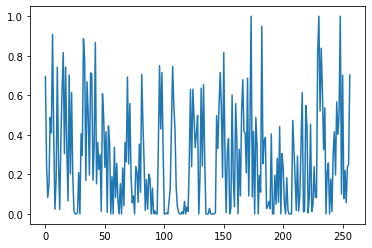

In [54]:
df['relative ASA'].plot()

## sasa

In [55]:
#подсчёт доступности растворителю
import freesasa
freesasa_structure = freesasa.Structure("6SBH.pdb")

In [56]:
result = freesasa.calc(freesasa_structure)
area_classes = freesasa.classifyResults(result, freesasa_structure)

print( "Total : %.2f A2" % result.totalArea())
for key in area_classes:
    print( key, ": %.2f A2" % area_classes[key])

Total : 11407.01 A2
Polar : 4873.40 A2
Apolar : 6533.60 A2


In [57]:
#для каждого ак 
u=mda.Universe('6SBH.pdb')
resids=[aa.resnum for aa in u.select_atoms('protein').residues]

C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\MDAnalysis\topology\guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: HG
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\MDAnalysis\topology\base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\MDAnalysis\topology\PDBParser.py:426: 

In [58]:
selections=[ f'r_{resid}, resi {resid}' for resid in resids]
sasa=freesasa.selectArea(selections, freesasa_structure, result)
sasa

{'r_4': 131.8364212507063,
 'r_5': 54.62087803806887,
 'r_6': 7.564443390953506,
 'r_7': 34.32028196940665,
 'r_8': 43.47204409073322,
 'r_9': 88.02419431949595,
 'r_10': 163.5395885346811,
 'r_11': 57.4725629107473,
 'r_12': 2.487086174829294,
 'r_13': 26.06368304066342,
 'r_14': 138.5509542156026,
 'r_15': 51.26785905318478,
 'r_16': 5.451988399653537,
 'r_17': 64.85708957475963,
 'r_18': 130.2198916659458,
 'r_19': 115.31116893109878,
 'r_20': 56.96871374575542,
 'r_21': 105.85439744856492,
 'r_22': 58.017297382184,
 'r_23': 8.926815098133654,
 'r_24': 145.00125987319433,
 'r_25': 17.90260922137574,
 'r_26': 114.12187111987997,
 'r_27': 48.17314071735615,
 'r_28': 2.7231891491047318,
 'r_29': 0.0,
 'r_30': 0.0,
 'r_31': 0.8173834088720342,
 'r_32': 28.732314053843165,
 'r_33': 0.12259862975628048,
 'r_34': 64.38148568257611,
 'r_35': 43.468499016270094,
 'r_36': 165.56939548646847,
 'r_37': 106.6856208090704,
 'r_38': 18.30312175605097,
 'r_39': 136.3657702532987,
 'r_40': 100.44534

In [59]:
df['sasa']=sasa.values()

In [60]:
(df['Kyte-Doolitle']*(df['sasa']/result.totalArea())).sum()

-1.982210284430574

## pI, pK

In [61]:
pa=ProteinAnalysis(sequence)
print(pa.charge_at_pH(7.0))
print(pa.isoelectric_point())

-0.2650908728685053
6.906471824645997


In [62]:
#для пробки нужно только белок
molecule=mda.Universe('6SBH.pdb')
protein=molecule.select_atoms('protein')
protein.write('6SBH_prot.pdb')

C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\MDAnalysis\core\topologyattrs.py:2011: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(sorted(unique_bonds)), 4)
C:\Programing\Miniconda\envs\struct_bioinf\lib\site-packages\MDAnalysis\core\topologyobjects.py:600: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  guessed = np.asarray(guessed, dtype=np.bool)


In [63]:

#не работает из функции, надо вручную из cmd
!conda activate struct_bioinf
!propka3 6SBH_prot.pdb

'propka3' is not recognized as an internal or external command,
operable program or batch file.


In [64]:
with open('6SBH_prot.pka','r') as f:
    print(f.read())


X   0 X    0.00 XXX   0 X   -0.09 ARG 246 A
GLU  14 A                                            0.00 XXX   0 X    0.00 XXX   0 X   -0.05 HIS  15 A
GLU  14 A                                            0.00 XXX   0 X    0.00 XXX   0 X   -0.05 HIS  17 A

GLU  26 A   4.29     0 %    0.31  192   0.00    0   -0.18 LYS 252 A    0.00 XXX   0 X   -0.35 LYS 252 A
GLU  26 A                                            0.00 XXX   0 X    0.00 XXX   0 X   -0.04 ARG 254 A
GLU  26 A                                            0.00 XXX   0 X    0.00 XXX   0 X    0.06 GLU 205 A

GLU  69 A   3.86    32 %    1.19  371   0.22    0   -1.60 ARG  58 A    0.00 XXX   0 X   -0.45 ARG  58 A

GLU 106 A   8.89   100 %    4.41  662   1.05    0   -0.85 THR 199 A   -0.84 ARG 246 A   -0.29 ARG 246 A
GLU 106 A                                            0.00 XXX   0 X    0.00 XXX   0 X    0.91 GLU 117 A

GLU 117 A   0.80   100 %    4.22  667   0.60    0   -1.60 HIS 107 A   -0.63 GLU 106 A   -0.05 HIS  94 A
GLU 117 A       

## Домашнее задание:
* Написать функцию, которая будет загружать файл из RCSB и анализировать его свойства при помощи Mdanalysis, DSSP, freesasa (Бонусное задание Propka). Минимальный набор свойств: Радиус гирации, индекс гидрофобности, доступная растворителю площадь, pI, атомная масса. Минимальная информация о белке Uniprot ID, организм, из которого получен белок.
* Найти в RCSB все белки лизоцима(lysozyme) с разрешением 1,5 и лучше. 
* Применить к найденым белкам функцию, результаты представить в виде Pandas Dataframe и сохранить в CSV файл.

### Бонусные задания:
* написать парсер результатов работы программы Propka
* функция обработчик должна представлять результаты обработки с разбиением по цепям. (понимает, одна или несколько цепей и разбивает по ним)